# Topic 4 -- Neural Networks

As we move on to using larger, more complex datasets, we soon run into an issue -- traditional linear and logistic regression is no longer sufficient to learn from those datasets. One might suggest to add a few extra features, like we did with polynomial regression, however when working with complex datasets already with many features, `PolynomialFeatures` would simply be too much and slow down computation dramatically.

Neural networks are state-of-the-art ML architectures derived from the humble logistic regression, and due to its "deep" nature, it is able to solve some of the most complex ML problems, kicking off the era of **Deep Learning**. In this notebook, you are going to learn about the structure of a neural network, as well as various other activation functions which together allow a neural network to learn much more complicated hypothesis functions.

## Table of Contents

1. [Installing Dependencies](#installing)


2. [Logistic Regression vs Neural Networks](#lvn)
    - [Neuron Representation of Logistic Regression](#neuronrep)
    - [Stacking Logistic Regression Units](#stacking)


3. [Neural Networks](#nn)
    - [Layers](#termin)
    - [Activation Function](#act)
    - [Why do we need an Activation Function](#why)
    

4. [How Neural Networks Learn](#learn)
    - [Forward Propagation](#forward)
    - [Calculating Cost](#cost)
    - [Back Propagation](#backprop)
    - [Update all $w$ and $b$](#update)
    
    
5. [Neural Network Applications](#applications)
    - [Multi-class Classification](#mclass)
    - [Multi-task Classification](#mtask)
    
    
6. [Neural Networks In Action](#action)
    - [Creating the Ultimate Candy](#candy)
    - [Visualizing the Dataset](#dataset)
    - [Training the Neural Network](#training)
    - [How Accuracy is Calculated in SKLearn](#acc)
    - [Other Metrics](#other)
    - [Conclusions](#conclusions)


## Installing Dependencies <a name="installing">
    
Before we begin, we first need to install some modules we are going to use in this notebook. Here is a brief description of the modules:

- **Numpy**: A powerful linear algebra library.
- **Pandas**: Used to organize our dataset.
- **SKLearn**: A highly abstract machine learning library.
- **MatPlotLib**, **SeaBorn**, and **Bokeh**: Data visualization libraries for plotting our dataset.
- **utils.py**: A custom module used to display graphics used in this notebook

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from bokeh.plotting import figure, show, output_notebook
from utils import *

## Logistic Regression vs Neural Networks <a name="lvn">
    
You've all seen Logistic Regression -- It consists of performing a **linear sum** and then feeding the sum into a **sigmoid** function, which gives you the output (then there is the whole gradient calculation process that updates the parameters). Believe it or not, Neural Networks are very similar. In fact, **a Neural Network is a bunch of Logistic Regression units stacked on top of one another**. To understand how it works, we need to look at the **"Neuron Representation" of Logistic Regression**.

### Neuron Representation of Logistic Regression <a name="neuronrep">
    
In the image below, we represent Logistic Regression as a connection of "Neurons":
    
<img src="images/logistic.png" alt="Cannot Display Image" width=900>
    
Here you can see that each of the inputs $x_1, x_2, ..., x_5$ are represented by its own neuron, and the weight parameters $w_1, ..., w_5$ represents **how strong** the connection of each input is. All of the weighted inputs are summed up to form the weighted sum $z$, which is then fed through the sigmoid function to produce the output $\hat{y}$
    
    
In Topic 2, we discussed about multiclass classification, where we are essentially training **multiple** Logistic Regression classifiers, each one to predict on a certain **class**. Here we show three classifiers used to predict on **orcas, ostriches, and deer**.
    
<img src="images/logmulti.png" alt="Cannot Display Image" width=900> 
    
Notice that these three models can be simplified a little -- since they share the same input (you can feed the same image of an orca into all of these classifiers, and one of them will output a 1), you can merge the three models into **one model** with **three outputs**:
    
<img src="images/logmultimerged.png" alt="Cannot Display Image" width=900> 

### Stacking Logistic Regression Units <a name="stacking">
    
So far, we know that Logistic Regression is able to learn from the **input data** to make predictions. *What if we are able to train a Logistic Regression model that learns from the output of another Logistic Regression model?* In other words, *what if we use the output of one Logistic Regression model as the input of another one?*

<img src="images/NN.png" alt="Cannot Display Image" width=900> 
    
This forms the concept of a **Neural Network**. Each layer in a Neural Network is a Logistic Regression Unit that is learning the output of the previous layer! Because you are chaining together multiple Logistic Regression units, a Neural Network is able to learn hypothesis functions that are far more complex than a single Logistic Regression unit can.
    
---

## Neural Networks <a name="nn">

### Layers <a name="layers">
    
Neural Networks can come in all shapes and sizes -- particularly, we can talk about the **number of layers** in a neural network, as well as the **number of neurons in each layer**. When we count the number of layers in a Neural Network, we count all BUT the input layer. For example, the picture you see above is a **two-layer neural network**. Just a side note, Logistic Regression models are also Neural Networks -- albeit with only one layer.
    
A bit ago we mentioned about the "deep" nature of a Neural Network. The **depth** of a neural network refers to the number of layers in a network. We've found that deeper networks are able to solve more complicated problems such as Natural Language Processing and Computer Vision.
    
There are three main types of layers in a Neural Network: the **input** layer, the **hidden** layers, and the **output** layer:
    
<img src="images/layers.png" alt="Cannot Display Image" width=900> 
    
**Input Layer**: These neurons recieve the input data and feed it into the Neural Network. You've seen these quite a bit before.
    
**Output Layer**: These neurons perform the final activation of the data before outputting it as the prediction. <u>**The output layer determines what problem your Neural Network is solving! If you do not use an activation function, and you use the MSE cost function, then your Neural Network will solve regression problems. If your output layer uses the sigmoid activation as well as BCE cost, then your Neural Network will solve classification problems**</u>

**Hidden Layers**: These layers are called "Hidden" layers because what exactly happens here is unknown. In a Neural Network, what you can easily **visualize** are the contents of the **input layer** and the **output layer**, however the hidden layer is like a **"black box"** where the patterns each neuron learns cannot easily be predicted. In the programming exercise, we will print out the activations in the hidden layers.
    
The term **"Forward Propagation"** is often use in the context of Neural Networks. This is to describe the input data propagating forward through each and every layer, until it arrives at the output as the prediction.
    
    
#### In Summary:
    
The input layer handels feeding in your data to the Neural Network.
    
The output layer decides the type of problem your Neural Network is going to solve, whether it is regression or classification
    
The hidden layers allows the Neural Network to solve more complicated problems, and **this is what differentiates Neural Networks from basic Linear or Logistic Regression**.

### Activation Functions <a name="act">
    
Back when we introduced Logistic Regression, we introduced the idea of the **sigmoid activation function** which bounds the output between 0 and 1. Turns out, while you can use the sigmoid function in a Neural Network, it is often not preferred in the hidden layers. This is because sigmoid functions have slopes that are very shallow, thus significantly slowing down learning.
    
The **Tanh** activation function is often used instead of sigmoid, because its slopes are generally steeper, thus Neural Networks train faster using the Tanh function. Let's take a look at the Tanh function and compare it to the sigmoid function we programmed last time.

In [13]:
""" Supported functions:
Tanh
Sigmoid
Linear
ReLU
ELU
Leaky ReLU
"""

disp_2_func("Tanh", "Sigmoid")

Loading BokehJS ...

Another popular activation function is the **ReLU** activation function, which stands for **Rectified Linear Unit**. This function is even faster than Tanh, and has recently gained traction as a favourite among deep learning researchers. The ReLU function is linear if $z = 0$, and is $0$ if $z < 0$

In [7]:
disp_2_func("ReLU", "Sigmoid")

Loading BokehJS ...

So far we have given reasons to NOT use the sigmoid function, however that does not mean it is completely useless. If you are developing a Neural Network for **classification problems**, you would want the **output layer** to use a **sigmoid activation**. In the same sense, if you are developing a Neural Network for **regression problems**, you would use a **linear** activation on the last layer. In other words, linear equals no activation.

### Why do we need an Activation Function? <a name="why">
    
So far we've introduced you to a plethora of activation functions, but the question remains, *\"Why do we need activation functions in the first place?\"* It seems like getting rid of activation functions will still allow data to be propagated from one layer to the next, so what gives? 
    
The formal answer requires a mathematical proof, and since this course does not go into the math behind Machine Learning, we are going to answer it without the proof (if you want the proof regardless, it is down below). **Using a Neural Network without any activation functions will effectively render all hidden layers useless. Your Neural Network will essentially behave like a single layer Neural Network (keep in mind that we don't count the input layer as a layer).**
    
<img src="images/activation.png" alt="Cannot display image" width="900px">
    
#### Proof for the Math Savvy
    
Notice that all activation functions are **Non-Linear** (except for the Linear activation function, obviously). The reason why Neural Networks behave like a one layer network when you use Linear activations is because the calculations for weighted sum are linear. Here we start off by defining the weighted sum:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l]} = W^{[l]}a^{[l-1]} + b^{[l]}$
    
</div>
    
Where:
- $z$ is the weighted sum of the layer $l$
- $W$ is the weight matrix of the layer $l$
- $a$ is the activation of the layer $l$
- $b$ is the bias of the layer $l$
- $l$ is the layer index
    
Suppose our activation is linear, therefore:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $a^{[l]} = z^{[l]}$
    
</div>
    
Now we define the weighted sum for the next layer:

    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W^{[l+1]}a^{[l]} + b^{[l+1]}$
    
</div>
    
And now, we sub in $a^{[l]}$ and simplify:
    
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W^{[l+1]}(W^{[l]}a^{[l-1]} + b^{[l]}) + b^{[l+1]}$  
</div>
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $z^{[l+1]} = W'a^{[l-1]} + b'$  
</div>
    
Where:
- $W' = W^{[l+]}W^{[l]}$
- $b' = W^{[l+1]}b^{[l]} + b^{[l+1]}$
    
Here, we can see that **we condensed two layers into one!** In fact we can continue to combine layers, effectively **reducing a multi-layer Neural Network into a single layer Neural Network** (with the computational complexity of the multi-layer net).
    
---

## How Neural Networks Learn <a name="learn">

By now, you have learned how Linear Regression models and Logistic Regression models learn to fit the training data. Turns out, since Neural Networks are essentially a bunch of Logistic Regression models chained together, the training procedure is very, very similar. Down below, we've detailed the steps taken by a Neural Network to fit the training data.

### Forward Propagation <a name="forward">
    
Forward propagation is the process of a Neural Network **making a prediction**. Each layer of the network has its own collection of weights $w$ and bias $b$. Information from one layer is **propagated** forward into the next layer, until it reaches the output layer.

<img src="images/fp.png" alt="Cannot display image" width=700>
    
### Calculating Cost <a name="cost">
    
Forward propagation takes an input and outputs a **prediction**. The next step is to see how **\"wrong\"** our prediction is. Here we calculate the cost of our prediction given the current state of all $w$ and $b$. This would measure how far off we are from the actual labels. Remember, if we developed a neural network for regression purposes, we would use a **linear activation** in the last layer and **MSE cost**. If we develop a Neural Network for classification purposes, then we would use **sigmoid** or **softmax** activation for the last layer and **BCE** or **CCE** cost (**SPOILER ALERT!!!** softmax and CCE loss will be covered soon!)
    
### Back Propagation <a name="backward">

The Back Propagation process, we take the cost evaluated by the cost function and calculate the slopes (gradients) of the cost with respect with the weights and biases of the last layer. Then the **errors are propagated backwards through each layer** until we have the slopes of the cost with respect to every $w$ and $b$.
    
<img src="images/bp.png" alt="Cannot display image" width=700>
    
### Update all $w$ and $b$ <a name="update">
    
The final step is to update all the $w$ and $b$ with its respective **gradients**. These four steps are carried out iteratively until all the $w$ and $b$ are at their optimal values to make predictions with the lowest cost. Overall, these steps are very similar to the learning procedure of Linear Regression and Logistic Regression.
    
---

## Neural Network Applications <a name="applications">
    
So far, we have tackled regression and classification problems using Linear and Logistic Regression. Neural Networks take that one step further, being able to tackle these problems with incredible accuracy and performance. While we won't talk about regression and binary classification problems, as we have done this before and the process is very similar on Neural Networks, we are going to revisit **multi-class** classification, as well as introduce a new type of classification called **multi-task classification**
    
    
### Multi-class Classification <a name="mclass">
    
The general gist of multi-class classification remains the same -- we are predicting on $n$ classes with $n$ output neurons in the output layer. Remember, this is very similar to training multiple Neural Networks for each class! The output neurons each have **sigmoid** activations, and the cost function used to evaluate the prediction error is **Binary Cross Entropy**. An example prediction from the multi-class neural network is shown below:
    
<img src="images/sigmoid-multiclass.png" alt="Cannot display image" width=900>
    
#### Softmax Activation 
    
As previously alluded, we are going to talk about another activation function. When performing multi-class classification, while the sigmoid activation function works very well, often times deep learning practitioners prefer the softmax activation function. Here's the formula for the function, even though we don't require you to know it for the course:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $\begin{align}\text{softmax}(z) = {e^z \over \sum\limits_{j=1}^{n^{[L]}}e^z_j}\end{align}$
    
</div>
    
Down below is shows the same Neural Network equipped with the softmax function on the output layer:
    
<img src="images/softmax-multiclass.png" alt="Cannot display image" width=900>    

See any differences? **The softmax activation function makes sure the output probabilities sum to 1**. This is the main reason why experts prefer softmax over sigmoid for multi-class classification, as it doesn't really make sense for an image to have a 70% probability to be an orca, and 40% probability to be a deer.
    
#### Categorical Cross Entropy
    
Since we are using a new activation function, we also need to use a different **cost** function. Neural Networks using the **softmax** activation function should use the **Categorical Cross Entropy (CCE)** cost function. This is slightly simpler than **BCE**, and thus slightly quicker.
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    $\begin{align}\text{CCE}(w, b) = {1\over m}\sum\limits_{i=1}^m \sum\limits_{j=1}^C y_j^{(i)}\log(\hat{y_j}^{(i)})\end{align}$
    
</div>
    
    
**In summary**, from now on when we build a multi-class classifer, we are going to use **softmax activation** and **CCE** instead of **sigmoid activation** and **BCE**

### Multi-task Classification <a name="mtask">
    
Multi-task classification works similarly to multi-class classification, however the key difference is multi-task classification allows for **multiple** output neurons to output 1, whereas in multi-class classification only one output neuron can output 1 at any time, which denotes the **class** of the input data
    
One example of Multi-task classification is in **self driving cars**. When the camera system in a self driving car captures the scene, the picture is not limited to only have traffic lights, or only to have pedestrians, or only to have street signs. The image might have pedestrians **and** street signs, or any combination of those three. For example, if we denote the label $y_1$ to be **pedestrians**, $y_2$ to be **stop signs**, and $y_3$ to be **traffic lights**, following label would represent an image with **pedestrians** and **traffic lights**:
    
<div style="text-align: center">
    <div>
        &nbsp;
    </div>
    <img src="images/traffic.jpg" alt="cannot load image" width=400> 
    <div>
        &nbsp;
    </div>
    $\hat{y} \  =  \ \begin{bmatrix}1 \\ 0 \\ 1\end{bmatrix} \begin{matrix}\implies\text{pedestrians} \\ \implies\text{no stop signs} \\  \implies\text{traffic lights}\end{matrix}$
    
</div>
    
Here, since the output doesn't have to sum to 1, we will use the **sigmoid activation** function along with **BCE loss**.
    
---

## Neural Networks In Action <a name="action"></a>

Congrats on making it this far! Now that you have learned how a Neural Network works, as well as some new and refreshed applications of Neural Networks, its time to train one to see it in action! For the sake of simplicity, we are going to train the Neural Network using **SKLearn's** `MLPClassifier` class.

> Note: "MLP" stands for "Multi Layer Perceptron". Perceptron is a fancy word for "Neuron", thus MLP basically means Neural Network!

### Creating the Ultimate Candy <a name="candy"></a>

Suppose you are running a **candy company** called **Skootles**. As with all candy companies, they want to maximize sales by creating a hit product that's going to fly off the store shelves. The product has to be **affordable** and **popular**. You notice that your competitors **N&N** has hired a handful of industry experts to analyze a dataset containing the **ingredients** of various candies and their corresponding **relative price** and **popularity**. You believe you can train a **Neural Network** that is going to cost much less than hiring experts, and possibly perform better as well.

### Visualizing the Dataset <a name="dataset"></a>

The first step is to understand what our data looks like. We will use the **The Ultimate Halloween Candy Power Ranking** dataset by [FiveThirtyEight](https://www.kaggle.com/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/). Loading the dataset should be quite familiar to you, as this was done in many of our previous topics.

In [8]:
dataset = pd.read_csv("datasets/candy-data.csv")
dataset

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


Looking at the DataFrame we created, we can see a bunch of candy features ranging from `chocolate` to `pluribus`, as well as the `sugarpercent`, `pricepercent`, and `winpercent`. Our goal for this problem is to predict the **ingredients** that will go into our candy given the inputs for relative cost (`pricepercent`) as well as popularity (`winpercent`).

Looking at the **first datapoint**, we can see that the candy in question contains **chocolate, caramel, rice wafer**, and is shaped like a **bar**. We want to be able to input the **price percentage** and **popularity**, and have the Neural Network output the optimal ingredients. That way, the candy makers at **Skootles** can input a high popularity, low price, and have the Neural Network predict on the ingredients needed to achieve that.

<img src="images/candy.png" alt="cannot display images" width=900>

#### Question for Students:

What kind of problem is this? Is this Regression, Binary Classification, Multi-class Classification, or Multi-task Classification?

In [65]:
# Convert selected columns to Numpy
features = dataset[['pricepercent', 'winpercent']].to_numpy()
labels = dataset.iloc[:, 1:10].to_numpy()


print(f"Features shape: {features.shape}")
print(f"Labels shape: {labels.shape}")

Features shape: (85, 2)
Labels shape: (85, 9)


### Training the Neural Network <a name="training"></a>


The next step is to preprocess the data. Everything is quite familiar here, except for the `StandardScaler` class. Recall in the previous topic, we learned that when features are on **vastly different scales**, the result is a **highly elliptical cost function** that is **tricky to traverse**. Implementing **standard normalization** in `LinearRegression` and `LogisticRegressionCV` was as simple as setting the `normalize` parameter to `True`. `MLPClassifier` however does not have that feature, so we have to implement it ourselves. The `StandardScaler` class is used to perform standard normalization to our data.

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Create polynomial features out of input
poly = PolynomialFeatures(degree=3)
# Used to normalize the input
scaler = StandardScaler()

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.25)

# Poly transforms and Scaling
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Now its time to implement our Neural Network in SKLearn. For this exercise, we are going to use **5 hidden layers** each with **3 neurons** to increase the complexity of hypothesis functions we could learn. `MLPClassifier` has already pre-set the output layer's activation function to **sigmoid**, which is great because this is a multi-task classification problem

What we need to specify is the activation function for the hidden units. 

#### Question for the students

`MLPClassifier` allows us to specify the activation function for the hidden units to be `"linear"`. Should we? Should we not? Why?

In [67]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), activation="relu", verbose=True, max_iter=10000, alpha=1e-4)

model.fit(X_train, Y_train)

Iteration 1, loss = 7.14794611
Iteration 2, loss = 7.13536295
Iteration 3, loss = 7.12281658
Iteration 4, loss = 7.11031665
Iteration 5, loss = 7.09783833
Iteration 6, loss = 7.08540021
Iteration 7, loss = 7.07301032
Iteration 8, loss = 7.06065289
Iteration 9, loss = 7.04826693
Iteration 10, loss = 7.03597115
Iteration 11, loss = 7.02373993
Iteration 12, loss = 7.01156917
Iteration 13, loss = 6.99944256
Iteration 14, loss = 6.98735969
Iteration 15, loss = 6.97532561
Iteration 16, loss = 6.96326998
Iteration 17, loss = 6.95125660
Iteration 18, loss = 6.93929321
Iteration 19, loss = 6.92736526
Iteration 20, loss = 6.91547680
Iteration 21, loss = 6.90360719
Iteration 22, loss = 6.89179367
Iteration 23, loss = 6.88001486
Iteration 24, loss = 6.86823139
Iteration 25, loss = 6.85637694
Iteration 26, loss = 6.84446835
Iteration 27, loss = 6.83261343
Iteration 28, loss = 6.82080640
Iteration 29, loss = 6.80908748
Iteration 30, loss = 6.79743077
Iteration 31, loss = 6.78582580
Iteration 32, los

Iteration 324, loss = 4.86819399
Iteration 325, loss = 4.86407294
Iteration 326, loss = 4.86001610
Iteration 327, loss = 4.85600921
Iteration 328, loss = 4.85205082
Iteration 329, loss = 4.84814188
Iteration 330, loss = 4.84428179
Iteration 331, loss = 4.84046958
Iteration 332, loss = 4.83670853
Iteration 333, loss = 4.83300142
Iteration 334, loss = 4.82934678
Iteration 335, loss = 4.82574105
Iteration 336, loss = 4.82218732
Iteration 337, loss = 4.81886729
Iteration 338, loss = 4.81563266
Iteration 339, loss = 4.81248271
Iteration 340, loss = 4.80944254
Iteration 341, loss = 4.80641331
Iteration 342, loss = 4.80339831
Iteration 343, loss = 4.80040068
Iteration 344, loss = 4.79742332
Iteration 345, loss = 4.79461109
Iteration 346, loss = 4.79186949
Iteration 347, loss = 4.78916116
Iteration 348, loss = 4.78648606
Iteration 349, loss = 4.78384755
Iteration 350, loss = 4.78124824
Iteration 351, loss = 4.77875935
Iteration 352, loss = 4.77622792
Iteration 353, loss = 4.77365736
Iteration 

Iteration 629, loss = 4.39710317
Iteration 630, loss = 4.39604819
Iteration 631, loss = 4.39499284
Iteration 632, loss = 4.39394000
Iteration 633, loss = 4.39289153
Iteration 634, loss = 4.39184549
Iteration 635, loss = 4.39079742
Iteration 636, loss = 4.38974949
Iteration 637, loss = 4.38870137
Iteration 638, loss = 4.38765955
Iteration 639, loss = 4.38661602
Iteration 640, loss = 4.38557706
Iteration 641, loss = 4.38453544
Iteration 642, loss = 4.38349497
Iteration 643, loss = 4.38246340
Iteration 644, loss = 4.38144057
Iteration 645, loss = 4.38038562
Iteration 646, loss = 4.37937377
Iteration 647, loss = 4.37832780
Iteration 648, loss = 4.37734364
Iteration 649, loss = 4.37631899
Iteration 650, loss = 4.37525274
Iteration 651, loss = 4.37432573
Iteration 652, loss = 4.37328148
Iteration 653, loss = 4.37218768
Iteration 654, loss = 4.37119586
Iteration 655, loss = 4.37015663
Iteration 656, loss = 4.36911813
Iteration 657, loss = 4.36809165
Iteration 658, loss = 4.36708052
Iteration 

Iteration 950, loss = 4.11366426
Iteration 951, loss = 4.11292764
Iteration 952, loss = 4.11218587
Iteration 953, loss = 4.11143972
Iteration 954, loss = 4.11068998
Iteration 955, loss = 4.10999927
Iteration 956, loss = 4.10926399
Iteration 957, loss = 4.10848522
Iteration 958, loss = 4.10776147
Iteration 959, loss = 4.10703216
Iteration 960, loss = 4.10629778
Iteration 961, loss = 4.10555889
Iteration 962, loss = 4.10482350
Iteration 963, loss = 4.10409531
Iteration 964, loss = 4.10337009
Iteration 965, loss = 4.10264065
Iteration 966, loss = 4.10190835
Iteration 967, loss = 4.10118865
Iteration 968, loss = 4.10046681
Iteration 969, loss = 4.09974204
Iteration 970, loss = 4.09901210
Iteration 971, loss = 4.09828267
Iteration 972, loss = 4.09756183
Iteration 973, loss = 4.09684029
Iteration 974, loss = 4.09611445
Iteration 975, loss = 4.09541159
Iteration 976, loss = 4.09467336
Iteration 977, loss = 4.09395804
Iteration 978, loss = 4.09323746
Iteration 979, loss = 4.09252492
Iteration 

Iteration 1287, loss = 3.90312432
Iteration 1288, loss = 3.90256132
Iteration 1289, loss = 3.90196207
Iteration 1290, loss = 3.90146653
Iteration 1291, loss = 3.90095449
Iteration 1292, loss = 3.90042757
Iteration 1293, loss = 3.89988591
Iteration 1294, loss = 3.89937381
Iteration 1295, loss = 3.89886148
Iteration 1296, loss = 3.89830681
Iteration 1297, loss = 3.89779244
Iteration 1298, loss = 3.89726968
Iteration 1299, loss = 3.89675840
Iteration 1300, loss = 3.89623838
Iteration 1301, loss = 3.89571328
Iteration 1302, loss = 3.89519588
Iteration 1303, loss = 3.89467522
Iteration 1304, loss = 3.89417862
Iteration 1305, loss = 3.89366763
Iteration 1306, loss = 3.89314167
Iteration 1307, loss = 3.89262842
Iteration 1308, loss = 3.89209891
Iteration 1309, loss = 3.89158450
Iteration 1310, loss = 3.89109947
Iteration 1311, loss = 3.89059864
Iteration 1312, loss = 3.89008099
Iteration 1313, loss = 3.88954913
Iteration 1314, loss = 3.88905226
Iteration 1315, loss = 3.88853549
Iteration 1316

Iteration 1627, loss = 3.75079252
Iteration 1628, loss = 3.75044296
Iteration 1629, loss = 3.75005828
Iteration 1630, loss = 3.74964547
Iteration 1631, loss = 3.74924317
Iteration 1632, loss = 3.74887555
Iteration 1633, loss = 3.74846546
Iteration 1634, loss = 3.74808835
Iteration 1635, loss = 3.74773666
Iteration 1636, loss = 3.74732989
Iteration 1637, loss = 3.74698769
Iteration 1638, loss = 3.74662608
Iteration 1639, loss = 3.74623243
Iteration 1640, loss = 3.74581127
Iteration 1641, loss = 3.74551493
Iteration 1642, loss = 3.74517231
Iteration 1643, loss = 3.74475361
Iteration 1644, loss = 3.74431323
Iteration 1645, loss = 3.74396891
Iteration 1646, loss = 3.74359278
Iteration 1647, loss = 3.74318788
Iteration 1648, loss = 3.74284951
Iteration 1649, loss = 3.74248146
Iteration 1650, loss = 3.74206585
Iteration 1651, loss = 3.74172529
Iteration 1652, loss = 3.74138075
Iteration 1653, loss = 3.74100083
Iteration 1654, loss = 3.74058913
Iteration 1655, loss = 3.74020789
Iteration 1656

Iteration 1921, loss = 3.65036115
Iteration 1922, loss = 3.65000631
Iteration 1923, loss = 3.64974506
Iteration 1924, loss = 3.64946516
Iteration 1925, loss = 3.64912171
Iteration 1926, loss = 3.64875892
Iteration 1927, loss = 3.64848966
Iteration 1928, loss = 3.64815574
Iteration 1929, loss = 3.64787689
Iteration 1930, loss = 3.64758522
Iteration 1931, loss = 3.64722398
Iteration 1932, loss = 3.64699633
Iteration 1933, loss = 3.64672479
Iteration 1934, loss = 3.64639691
Iteration 1935, loss = 3.64604448
Iteration 1936, loss = 3.64574581
Iteration 1937, loss = 3.64547207
Iteration 1938, loss = 3.64511491
Iteration 1939, loss = 3.64481166
Iteration 1940, loss = 3.64454575
Iteration 1941, loss = 3.64422272
Iteration 1942, loss = 3.64386331
Iteration 1943, loss = 3.64365327
Iteration 1944, loss = 3.64337736
Iteration 1945, loss = 3.64303729
Iteration 1946, loss = 3.64264407
Iteration 1947, loss = 3.64235539
Iteration 1948, loss = 3.64203773
Iteration 1949, loss = 3.64174482
Iteration 1950

Iteration 2233, loss = 3.56163287
Iteration 2234, loss = 3.56139536
Iteration 2235, loss = 3.56112680
Iteration 2236, loss = 3.56083675
Iteration 2237, loss = 3.56060716
Iteration 2238, loss = 3.56030968
Iteration 2239, loss = 3.56010065
Iteration 2240, loss = 3.55986782
Iteration 2241, loss = 3.55959843
Iteration 2242, loss = 3.55929618
Iteration 2243, loss = 3.55905262
Iteration 2244, loss = 3.55876780
Iteration 2245, loss = 3.55851191
Iteration 2246, loss = 3.55828191
Iteration 2247, loss = 3.55799924
Iteration 2248, loss = 3.55768324
Iteration 2249, loss = 3.55750978
Iteration 2250, loss = 3.55723775
Iteration 2251, loss = 3.55692872
Iteration 2252, loss = 3.55668820
Iteration 2253, loss = 3.55642763
Iteration 2254, loss = 3.55613831
Iteration 2255, loss = 3.55588422
Iteration 2256, loss = 3.55558546
Iteration 2257, loss = 3.55532283
Iteration 2258, loss = 3.55509851
Iteration 2259, loss = 3.55484203
Iteration 2260, loss = 3.55459449
Iteration 2261, loss = 3.55430480
Iteration 2262

Iteration 2547, loss = 3.48600464
Iteration 2548, loss = 3.48578099
Iteration 2549, loss = 3.48554608
Iteration 2550, loss = 3.48529988
Iteration 2551, loss = 3.48515100
Iteration 2552, loss = 3.48488488
Iteration 2553, loss = 3.48469647
Iteration 2554, loss = 3.48448809
Iteration 2555, loss = 3.48426113
Iteration 2556, loss = 3.48401843
Iteration 2557, loss = 3.48380985
Iteration 2558, loss = 3.48357980
Iteration 2559, loss = 3.48337906
Iteration 2560, loss = 3.48316221
Iteration 2561, loss = 3.48293139
Iteration 2562, loss = 3.48268772
Iteration 2563, loss = 3.48254186
Iteration 2564, loss = 3.48224554
Iteration 2565, loss = 3.48204666
Iteration 2566, loss = 3.48182983
Iteration 2567, loss = 3.48159371
Iteration 2568, loss = 3.48138152
Iteration 2569, loss = 3.48118631
Iteration 2570, loss = 3.48098250
Iteration 2571, loss = 3.48079276
Iteration 2572, loss = 3.48057974
Iteration 2573, loss = 3.48035024
Iteration 2574, loss = 3.48011652
Iteration 2575, loss = 3.47988315
Iteration 2576

Iteration 2860, loss = 3.42182424
Iteration 2861, loss = 3.42164110
Iteration 2862, loss = 3.42145006
Iteration 2863, loss = 3.42124993
Iteration 2864, loss = 3.42104364
Iteration 2865, loss = 3.42083007
Iteration 2866, loss = 3.42061202
Iteration 2867, loss = 3.42047330
Iteration 2868, loss = 3.42023379
Iteration 2869, loss = 3.42006531
Iteration 2870, loss = 3.41989327
Iteration 2871, loss = 3.41971171
Iteration 2872, loss = 3.41952117
Iteration 2873, loss = 3.41932358
Iteration 2874, loss = 3.41911793
Iteration 2875, loss = 3.41892631
Iteration 2876, loss = 3.41871200
Iteration 2877, loss = 3.41850436
Iteration 2878, loss = 3.41830029
Iteration 2879, loss = 3.41808876
Iteration 2880, loss = 3.41789016
Iteration 2881, loss = 3.41773412
Iteration 2882, loss = 3.41751502
Iteration 2883, loss = 3.41735106
Iteration 2884, loss = 3.41717924
Iteration 2885, loss = 3.41699660
Iteration 2886, loss = 3.41680387
Iteration 2887, loss = 3.41660511
Iteration 2888, loss = 3.41639681
Iteration 2889

Iteration 3172, loss = 3.36211958
Iteration 3173, loss = 3.36200646
Iteration 3174, loss = 3.36180370
Iteration 3175, loss = 3.36164055
Iteration 3176, loss = 3.36149661
Iteration 3177, loss = 3.36130276
Iteration 3178, loss = 3.36111253
Iteration 3179, loss = 3.36092367
Iteration 3180, loss = 3.36070523
Iteration 3181, loss = 3.36053963
Iteration 3182, loss = 3.36037057
Iteration 3183, loss = 3.36022662
Iteration 3184, loss = 3.36000578
Iteration 3185, loss = 3.35982973
Iteration 3186, loss = 3.35969717
Iteration 3187, loss = 3.35947035
Iteration 3188, loss = 3.35928395
Iteration 3189, loss = 3.35910551
Iteration 3190, loss = 3.35887672
Iteration 3191, loss = 3.35868397
Iteration 3192, loss = 3.35849004
Iteration 3193, loss = 3.35831100
Iteration 3194, loss = 3.35815391
Iteration 3195, loss = 3.35793639
Iteration 3196, loss = 3.35775661
Iteration 3197, loss = 3.35759881
Iteration 3198, loss = 3.35740341
Iteration 3199, loss = 3.35732011
Iteration 3200, loss = 3.35706774
Iteration 3201

Iteration 3485, loss = 3.30964152
Iteration 3486, loss = 3.30949918
Iteration 3487, loss = 3.30938331
Iteration 3488, loss = 3.30925616
Iteration 3489, loss = 3.30906978
Iteration 3490, loss = 3.30893802
Iteration 3491, loss = 3.30879492
Iteration 3492, loss = 3.30858214
Iteration 3493, loss = 3.30848776
Iteration 3494, loss = 3.30827739
Iteration 3495, loss = 3.30817729
Iteration 3496, loss = 3.30804155
Iteration 3497, loss = 3.30783591
Iteration 3498, loss = 3.30772344
Iteration 3499, loss = 3.30761416
Iteration 3500, loss = 3.30742546
Iteration 3501, loss = 3.30732831
Iteration 3502, loss = 3.30716235
Iteration 3503, loss = 3.30700758
Iteration 3504, loss = 3.30687190
Iteration 3505, loss = 3.30671646
Iteration 3506, loss = 3.30657526
Iteration 3507, loss = 3.30640085
Iteration 3508, loss = 3.30628476
Iteration 3509, loss = 3.30610158
Iteration 3510, loss = 3.30591574
Iteration 3511, loss = 3.30591481
Iteration 3512, loss = 3.30567343
Iteration 3513, loss = 3.30560070
Iteration 3514

Iteration 3790, loss = 3.27001377
Iteration 3791, loss = 3.26984321
Iteration 3792, loss = 3.26975140
Iteration 3793, loss = 3.26967191
Iteration 3794, loss = 3.26956771
Iteration 3795, loss = 3.26942564
Iteration 3796, loss = 3.26928239
Iteration 3797, loss = 3.26922842
Iteration 3798, loss = 3.26908382
Iteration 3799, loss = 3.26893201
Iteration 3800, loss = 3.26892102
Iteration 3801, loss = 3.26875536
Iteration 3802, loss = 3.26863343
Iteration 3803, loss = 3.26857875
Iteration 3804, loss = 3.26837044
Iteration 3805, loss = 3.26839559
Iteration 3806, loss = 3.26821707
Iteration 3807, loss = 3.26810568
Iteration 3808, loss = 3.26800937
Iteration 3809, loss = 3.26786650
Iteration 3810, loss = 3.26788286
Iteration 3811, loss = 3.26770117
Iteration 3812, loss = 3.26748230
Iteration 3813, loss = 3.26743978
Iteration 3814, loss = 3.26736517
Iteration 3815, loss = 3.26725323
Iteration 3816, loss = 3.26707371
Iteration 3817, loss = 3.26702258
Iteration 3818, loss = 3.26695070
Iteration 3819

Iteration 4135, loss = 3.23787774
Iteration 4136, loss = 3.23790605
Iteration 4137, loss = 3.23776947
Iteration 4138, loss = 3.23769000
Iteration 4139, loss = 3.23763851
Iteration 4140, loss = 3.23745446
Iteration 4141, loss = 3.23745943
Iteration 4142, loss = 3.23732680
Iteration 4143, loss = 3.23717252
Iteration 4144, loss = 3.23704980
Iteration 4145, loss = 3.23698042
Iteration 4146, loss = 3.23685942
Iteration 4147, loss = 3.23676216
Iteration 4148, loss = 3.23668621
Iteration 4149, loss = 3.23657691
Iteration 4150, loss = 3.23653213
Iteration 4151, loss = 3.23638014
Iteration 4152, loss = 3.23641937
Iteration 4153, loss = 3.23651055
Iteration 4154, loss = 3.23618575
Iteration 4155, loss = 3.23616058
Iteration 4156, loss = 3.23619199
Iteration 4157, loss = 3.23609992
Iteration 4158, loss = 3.23598315
Iteration 4159, loss = 3.23590106
Iteration 4160, loss = 3.23569268
Iteration 4161, loss = 3.23566189
Iteration 4162, loss = 3.23560827
Iteration 4163, loss = 3.23545571
Iteration 4164

MLPClassifier(hidden_layer_sizes=(3, 3, 3, 3, 3), max_iter=10000, verbose=True)

In [68]:
print(f"Accuracy: {model.score(X_test, Y_test)}")
Y_pred = model.predict(X_test)

Accuracy: 0.2727272727272727


Well that doesn't look too good! After fitting the Neural Network, we are greeted with a very low accuracy score. Let's explore what might have gone wrong here.

### How Accuracy is Calculated in SKLearn<a name="acc"></a>

`MLPClassifier`'s `score` method returns the **accuracy** metric between the predictions and the true labels. **Accuracy** is the measure of how many items the Neural Network gets correct out of all of the predictions. Think of it as you are taking a multiple choice test -- if you get it right, you get the mark, however if you get it wrong, there are no partial marks given. 

This works great for **multi-class** problems, because multi-class classification problems are quite literally multiple choice problems!

<img src="images/labpred.png" alt="Cannot display image" width=900px>

However, when dealing with multi-task classification, we are trying to predict on several classes independently. In this case, Accuracy metric works very poorly. Heres a figure explaining why:

<img src="images/predlab1.png" alt="Cannot display image" width=900px>

Suppose this is from a multi-task classifier used to detect ingredients in candies. Notice how for 8 classes the classifier predicted the output correctly. However, because of one mistake, the entire example is marked wrong. This is why in multi-task classification, we actually need to find the accuracies of the individual classes.

In [69]:
def multi_task_acc(Y_true, Y_pred):
    """ Calculates the Accuracy for each class
    Args:
        Y_true: np.ndarray containing class labels. shape = (num_examples x num_classes)
        Y_pred: np.ndarray containing predicted outputs. shape same as Y_true
        
    Returns:
        df: pd.DataFrame with the columns being the string name of each class, 
            and the index containing the accuracy
    """
    
    # diff will contain 0 if elements are the same, 1 if different
    diff = np.absolute(Y_true - Y_pred)

    # calculates how many errors are in each class
    sum_down = np.sum(diff, axis=0).astype(float)
    num_of_items = float(Y_true.shape[0])
    
    # Calculates accuracies
    accuracies = (1-(sum_down/num_of_items)).reshape(1, -1)
    df = pd.DataFrame(accuracies, columns=dataset.columns[1:10], index=["accuracy"])
    return df
    
multi_task_acc(Y_test, Y_pred)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
accuracy,0.863636,0.818182,0.772727,0.772727,0.954545,0.954545,0.863636,0.818182,0.681818


By calculating the accuracies of each individual class, we are able to obtain more reasonable results. Next up, lets also calculate the F1 scores of each class

### Other Metrics <a name="other"></a>

For a recap, the reason why we use F1 score is because **accuracy only tells us how many predictions we got right, however it does not account for imbalanced classes**, whereas **precision** and **recall** excels with datasets with large number of negative labels. F1 score is a combination of precision and recall, and thus this metric is often used **alongside** accuracy to give us a better sense of how well the Neural Network is actually doing.

In [72]:
from sklearn.metrics import f1_score

def multi_task_f1(Y_true, Y_pred):
    """ Calculates the F1 score for each class
    Args:
        Y_true: np.ndarray containing class labels. shape = (num_examples x num_classes)
        Y_pred: np.ndarray containing predicted outputs. shape same as Y_true
        
    Returns:
        df: pd.DataFrame with the columns being the string name of each class, 
            and the index containing the accuracy
    """
    fscores = []
    # Loops over the classes to calculate F1 for each class
    for i in range(Y_true.shape[1]):
        # must flatten, as it is requred for fscores()
        yt = Y_true[:, i].flatten()
        yp = Y_pred[:, i].flatten()
        fscores.append(f1_score(yt, yp))
    fscores = np.array(fscores).reshape(1, -1)
    df = pd.DataFrame(fscores, columns=dataset.columns[1:10], index=["f1"])
    return df
    
    
multi_task_f1(Y_test, Y_pred)
    

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
f1,0.823529,0.846154,0.0,0.0,0.0,0.0,0.0,0.666667,0.740741


When we display the F1 scores for each class, we notice many classes have an **F1 score of 0**. So far, we have seen the accuracy metric as well as the F1 score metric, and currently it's still not giving us a clue on how well the Neural Network really is doing. Maybe visualizing the confusion matrices might give us some clues.

To plot the confusion matrices, we will use `SeaBorn`'s `heatmap` method. Because this is a multi-task classification task, we are going to **plot individual confusion matrices for each task**.

['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']


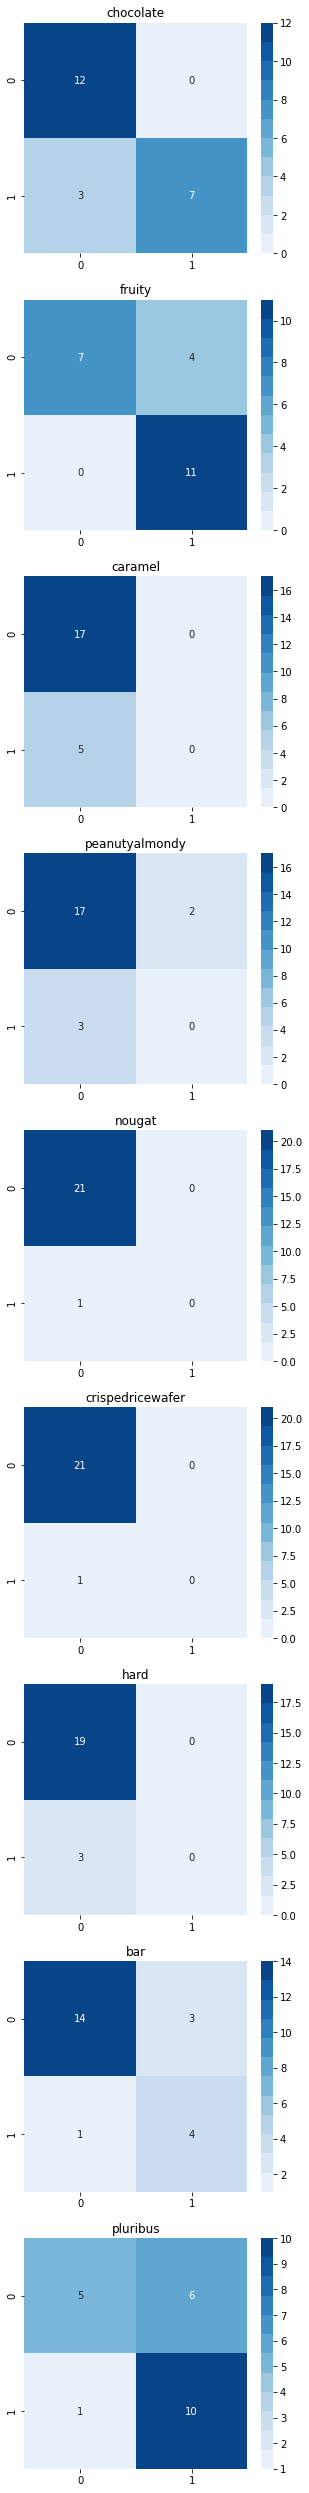

In [71]:
from sklearn.metrics import multilabel_confusion_matrix

# Contains the class names
classlst = list(dataset.columns.values[1:10])
print(classlst)

# calculates the multi-label confusion matrix for our classifier
conf_mats = multilabel_confusion_matrix(Y_test, Y_pred)

# Creates subplots using matplotlib
fig, axes = plt.subplots(conf_mats.shape[0], 1, figsize=(5, 45))

# Looping through every class
for i in range(conf_mats.shape[0]):
    sn.heatmap(conf_mats[i],ax=axes[i], annot=True, cmap=sn.color_palette("Blues",12))
    axes[i].set_title(classlst[i])

### Conclusions <a name="conclusions"></a>

Overall, after examining the confusion matrices as well as our accuracy and F1 matrics, we can conclude that this neural network performs rather poorly in some tasks, whereas in other tasks, notably on predicting the existance of **chocolate**, the Neural Network performs quite good. In the end, you chose to deploy your Neural Network for **Skootles**. The product developemnt team used the values of **90%** popularity and **10%** relative cost as inputs to the network:

In [48]:
X_in = scaler.transform(poly.transform(np.array([[0.1, 90]])))

Y_out = model.predict(X_in).reshape(1, -1)

prediction_df = pd.DataFrame(Y_out, columns=dataset.columns[1:10], index=["Prediction"])
prediction_df

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
Prediction,1,0,0,0,0,0,0,1,0


#### Question for Students:

What might be the reason for the poor performance of this Neural Network?
___

## $\mathcal{Fin}$ <a name="fin"></a>

Congrats on reaching the end of this notebook! Hope you have understood the inner workings of Neural Networks, as well as their applications. Up next, we are going to explore Neural Networks using the powerful tools provided in PyTorch. Stay Tuned....

<img src="images/meme.jpeg" alt="cannot display image" width="700px">